In [18]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stat
import datetime
from arch.unitroot import VarianceRatio
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("TSLA.csv")

#see your data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,3.80,5.00,3.51,4.78,4.78,93831500.0
1,6/30/2010,5.16,6.08,4.66,4.77,4.77,85935500.0
2,7/1/2010,5.00,5.18,4.05,4.39,4.39,41094000.0
3,7/2/2010,4.60,4.62,3.74,3.84,3.84,25699000.0
4,7/6/2010,4.00,4.00,3.17,3.22,3.22,34334500.0
...,...,...,...,...,...,...,...
2908,1/14/2022,1019.88,1052.00,1013.38,1049.61,1049.61,24246600.0
2909,1/18/2022,1026.61,1070.79,1016.06,1030.51,1030.51,22247800.0
2910,1/19/2022,1041.71,1054.67,995.00,995.65,995.65,25147500.0
2911,1/20/2022,1009.73,1041.66,994.00,996.27,996.27,23496200.0




Simple return: $R_t=\frac{P_t - P_{t-1}}{P_{t-1}}$

Log-return: $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)=\log{P_t}-\log{P_{t-1}}$

In [19]:
#convert date into datetime for later resampling purposes 
df['Date'] = df.loc[:,'Date'].astype('datetime64[ns]')

df = df[['Date','Adj Close']]
df.set_index('Date',inplace=True)
print(df)

            Adj Close
Date                 
2010-06-29       4.78
2010-06-30       4.77
2010-07-01       4.39
2010-07-02       3.84
2010-07-06       3.22
...               ...
2022-01-14    1049.61
2022-01-18    1030.51
2022-01-19     995.65
2022-01-20     996.27
2022-01-21     943.90

[2913 rows x 1 columns]


In [20]:
#Resample dataframe in order to get monthly prices and yearly prices
df_Monthly_Price = df.resample('M').mean()
df_Yearly_Price = df.resample('Y').mean()
print(df_Monthly_Price)
print(df_Yearly_Price)

              Adj Close
Date                   
2010-06-30     4.775000
2010-07-31     3.911429
2010-08-31     3.902273
2010-09-30     4.147619
2010-10-31     4.143333
...                 ...
2021-09-30   753.952381
2021-10-31   878.349048
2021-11-30  1120.662381
2021-12-31  1018.890000
2022-01-31  1057.527857

[140 rows x 1 columns]
              Adj Close
Date                   
2010-12-31     4.668462
2011-12-31     5.360833
2012-12-31     6.233480
2013-12-31    20.880635
2014-12-31    44.665675
2015-12-31    46.008571
2016-12-31    41.953492
2017-12-31    62.863307
2018-12-31    63.461992
2019-12-31    54.706111
2020-12-31   289.997075
2021-12-31   779.994484
2022-12-31  1057.527857


In [21]:
price = df_Monthly_Price["Adj Close"]

simple_return = price.pct_change()

log_return = np.log(1+simple_return)


Populating the interactive namespace from numpy and matplotlib


C:\Users\Valentina\AppData\Roaming\Python\Python38\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['multivariate_normal']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


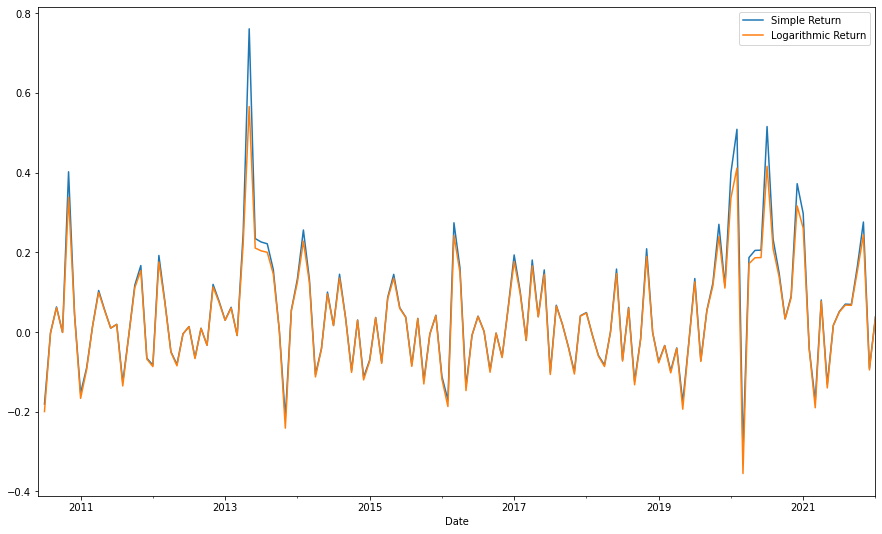

In [22]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

simple_return.plot(label = 'Simple Return')# Plot the lsimple return
log_return.plot(label = 'Logarithmic Return') # Plot the logreturn
plt.legend()


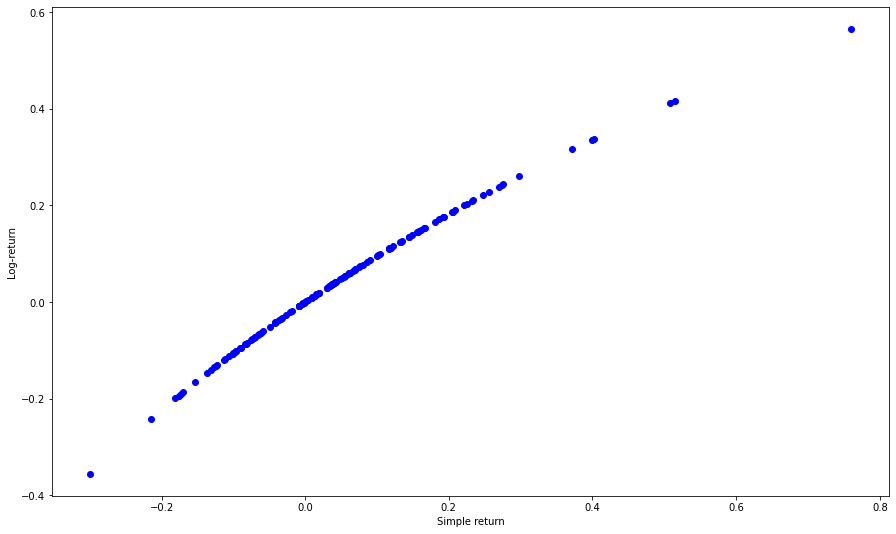

In [23]:
plt.plot(simple_return,log_return, 'o',c='blue')
plt.ylabel( 'Log-return' )
plt.xlabel( 'Simple return' )
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

C:\Program Files\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


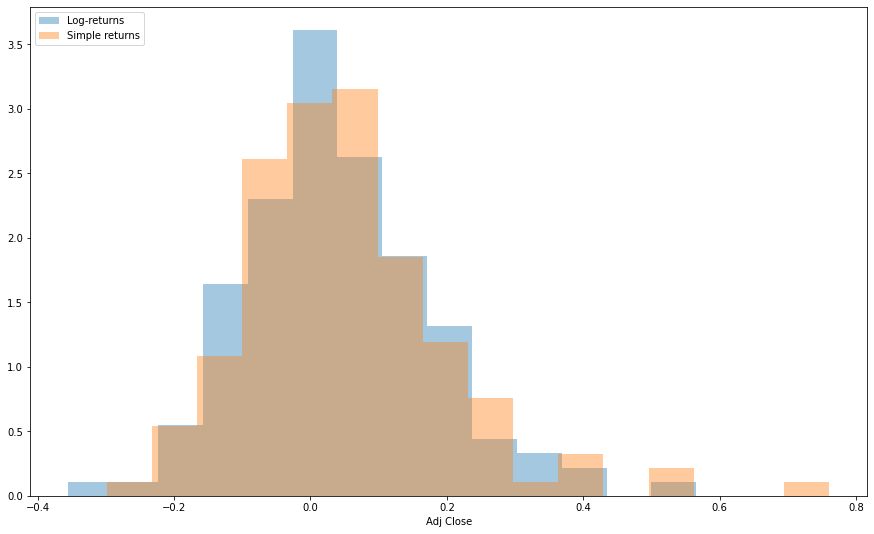

In [24]:
import seaborn as sns

# histogram
sns.distplot(log_return, kde=False, norm_hist=True,label='Log-returns') 
sns.distplot(simple_return, kde=False, norm_hist=True, label='Simple returns')  

legend(loc='upper left');

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [25]:
log_return.describe()

count    139.000000
mean       0.038851
std        0.136763
min       -0.355083
25%       -0.055735
50%        0.033583
75%        0.119674
max        0.565615
Name: Adj Close, dtype: float64

In [26]:
adj_close = pd.DataFrame(df["Adj Close"])
adj_close

,Adj Close
Date,
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22
...,...
2022-01-14,1049.61
2022-01-18,1030.51
2022-01-19,995.65


Populating the interactive namespace from numpy and matplotlib


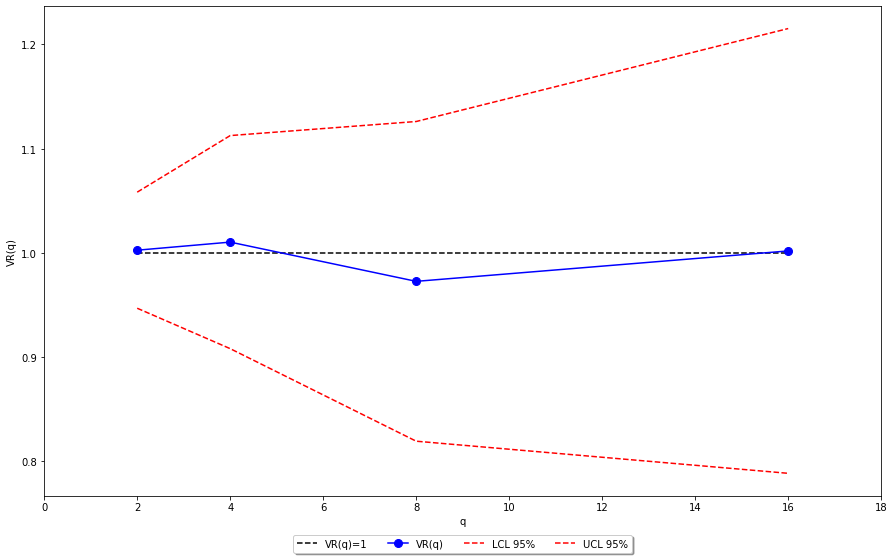

In [27]:
x = np.asarray(adj_close)
x = np.log(x)
N=len(x)
vr_1=[]
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
p_value=[]
stderr=[]
alpha=0.05
k=4

def VRTest():
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
        vr = VarianceRatio(x, a)
        vrt.append(vr.vr)
        se=np.sqrt(vr._stat_variance)/np.sqrt(vr._nobs-1)
        stderr.append(se)
        lower=vr.vr-stat.norm.ppf(1-alpha/2)*se
        upper=vr.vr+stat.norm.ppf(1-alpha/2)*se
        one=1
        zvrt.append(vr.stat)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        p_value.append(vr.pvalue)

    return vrt,p_value,zvrt,q,stderr 
VRTest()

confidence=1-alpha
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q, vr_1,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q, vrt, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q, lcl,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence)))
plt.plot(q, ucl,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

# Individual Variance Ratio Tests

In [28]:
results=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results['q']=q
results['VR test']=vrt
results['Std. Error']=stderr
results['z statistic']=zvrt
results['P-value']=p_value

In [29]:
%%latex
\[\left\{ \begin{align}
  & {{H}_{0i}}:VR({{q}_{i}})=1 \\ 
 & {{H}_{Ai}}:VR({{q}_{i}})\ne 1 \\ 
\end{align} \right.\]


<IPython.core.display.Latex object>

In [30]:
results

,q,VR test,Std. Error,z statistic,P-value
0,2,1.002562,0.028421,0.090159,0.928161
1,4,1.010321,0.052175,0.197807,0.843196
2,8,0.972660,0.078280,-0.349259,0.726895
3,16,1.001857,0.108904,0.017049,0.986398


# Multiple Variance Ratio Test - Studentized Maximum Modulus

In [31]:
z=abs(results["z statistic"]).max()
alpha_star=1-(1-alpha)**(1/k)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star

mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,0.349259,2.490915,Cannot reject the null hypothesis of random walk


# Multiple Variance Ratio Test - Wald Test
Wai Mun Fong, Seng Kee Koh & Sam Ouliaris (1997) 
Joint Variance-Ratio Tests of the Martingale Hypothesis for Exchange Rates, 
Journal of Business & Economic Statistics, 15:1, 51-59, DOI: 10.1080/07350015.1997.10524686


Wald Test=$N\left[\hat{V}_{m}-l_{m}\right]^{\prime} \Phi^{-1}\left[\hat{V}_{m}-l_{m}\right] \sim \chi_{m}^{2}$

$m$ - the number of lags

$\Phi$ - covariance matrix of ${V}_{m}$

${V}_{m}$ - individual Variance Ratio statistics

$l_{m}$ is an $m \times 1$ unit vector

$\Phi=\left(\begin{array}{cc}\frac{2(2 r-1)(r-1)}{3 r} &
            \frac{2(3 s-r-1)(r-1)}{3 s} \\ \frac{2(3 s-r-1)(r-1)}{3 s}
            & \frac{2(2 s-1)(s-1)}{3 s}\end{array}\right)$, $r,s$  - lags

In [32]:
#Compute the covariance matrix
cov1=np.zeros((k,k))

q=np.asarray(q)

for i in range (0,k-1):
    for j in range (i+1,k):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k):
    #for j in range (i+1,k):
  
    cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt)-1,np.linalg.inv(cov))
                    
Wald_Test=N*np.matmul(Wald_Test,np.transpose(np.asarray(vrt)-1))

p_val= 1-stat.chi2.cdf(Wald_Test,k)

mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha/2,k)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,5.48396,0.484419,0.241143,Cannot reject the null hypothesis of random walk


# VAR

In [39]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import datetime as dt
    
# Create our portfolio of equities
tickers = ['AAPL','MSFT', 'TSLA', 'GOOG']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.15, .3, .3, .25])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2018-01-01", end=dt.date.today())['Adj Close']
 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

Symbols,AAPL,MSFT,TSLA,GOOG
Date,,,,
2022-01-18,-0.018894,-0.024339,-0.018197,-0.025010
2022-01-19,-0.021025,0.002247,-0.033828,-0.004685
2022-01-20,-0.010347,-0.005703,0.000623,-0.015816
2022-01-21,-0.012765,-0.018468,-0.052566,-0.025575
2022-01-24,-0.004864,0.001149,-0.014726,0.002152


In [34]:
cov_matrix = returns.cov()
cov_matrix
#This will allow us to calculate the standard deviation and mean of returns across the entire portfolio.

Symbols,AAPL,MSFT,TSLA,GOOG
Symbols,,,,
AAPL,0.000426,0.000294,0.000358,0.000255
MSFT,0.000294,0.000353,0.000337,0.000273
TSLA,0.000358,0.000337,0.001694,0.000278
GOOG,0.000255,0.000273,0.000278,0.000337


In [35]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
 
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [36]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [37]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1
#output
#Here we are saying with 95% confidence that our portfolio of 1M USD will not exceed losses greater than 32k USD over a one day period.

32382.009781739907

1 day VaR @ 95% confidence: 32382.01
2 day VaR @ 95% confidence: 45795.08
3 day VaR @ 95% confidence: 56087.29
4 day VaR @ 95% confidence: 64764.02
5 day VaR @ 95% confidence: 72408.38
6 day VaR @ 95% confidence: 79319.4
7 day VaR @ 95% confidence: 85674.74
8 day VaR @ 95% confidence: 91590.15
9 day VaR @ 95% confidence: 97146.03
10 day VaR @ 95% confidence: 102400.91
11 day VaR @ 95% confidence: 107398.98
12 day VaR @ 95% confidence: 112174.57
13 day VaR @ 95% confidence: 116755.0
14 day VaR @ 95% confidence: 121162.39
15 day VaR @ 95% confidence: 125414.98


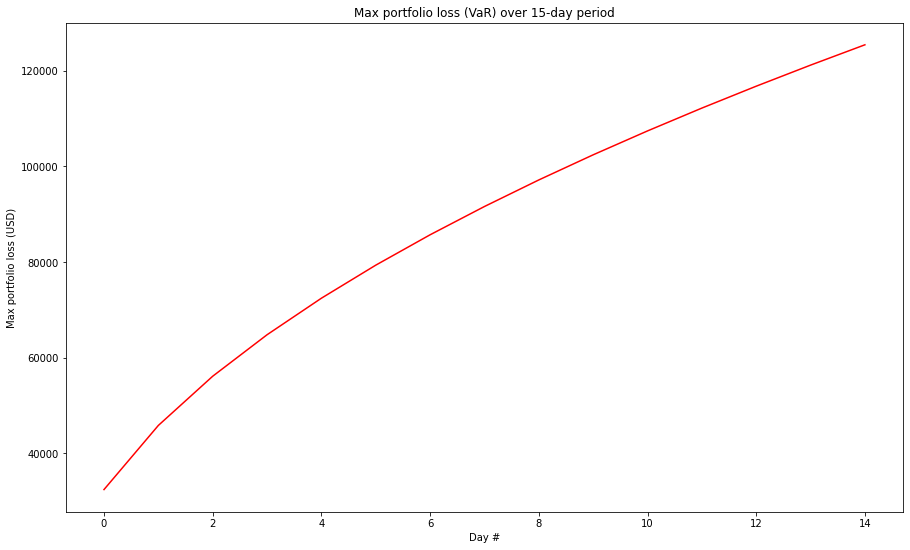

In [38]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")